## Compiling Iteratitive QPE (Kitaev's) using single ancilla

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def phase_estimation_circuit(phase, m):
    """Creates and returns the phase estimation circuit"""
    sim = Aer.get_backend('qasm_simulator')
    nq = 2  # Number of qubits in the quantum register (constant in this setup)
    q = QuantumRegister(nq, 'q')
    c = ClassicalRegister(m, 'c')
    qc = QuantumCircuit(q, c)

    # Initialize the circuit
    qc.h(0)
    qc.x(1)

    # Controlled-U operations
    for t in range(m):
        repetitions = 2 ** (m - t - 1)
        for _ in range(repetitions):
            qc.cp(2 * np.pi * phase, 0, 1)

        # Measure in the X-basis
        qc.h(0)
        qc.measure(0, t)
        qc.reset(0)
        qc.h(0)

        # Conditional phase based on the classical bit
        if t < m - 1:
            qc.p(-np.pi / 2, 0).c_if(c, 1)

    return qc

def run_phase_estimation(phase, m):
    """Runs the phase estimation and plots histograms"""
    qc = phase_estimation_circuit(phase, m)
    sim = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(qc, sim)
    result = sim.run(transpiled_circuit).result().get_counts()

    # Convert counts to phase estimates
    key_new = [str(int(key, 2) / 2**m) for key in list(result.keys())]
    count_new = dict(zip(key_new, result.values()))

    # Plotting results
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_histogram(result, ax=ax[0], title="Raw Counts")
    plot_histogram(count_new, ax=ax[1], title="Phase Estimates")
    plt.tight_layout()
    plt.show()

    return qc

# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile
# from qiskit.visualization import plot_histogram
# import numpy as np
# import matplotlib.pyplot as plt

# def phase_estimation_circuit(phase, m):
#     """Creates and returns the phase estimation circuit"""
#     sim = Aer.get_backend('qasm_simulator')
#     nq = 2  # Number of qubits in the quantum register (constant in this setup)
#     q = QuantumRegister(nq, 'q')
#     c = ClassicalRegister(m, 'c')
#     qc = QuantumCircuit(q, c)

#     # Initialize the circuit
#     qc.h(0)
#     qc.x(1)

#     # Controlled-U operations
#     for t in range(m):
#         repetitions = 2 ** (m - t - 1)
#         for _ in range(repetitions):
#             qc.cp(2 * np.pi * phase, 0, 1)

#         # Measure in the X-basis
#         qc.h(0)
#         qc.measure(0, t)
#         qc.reset(0)
#         qc.h(0)

#         # Conditional phase based on the classical bit
#         if t < m - 1:
#             qc.p(-np.pi / 2, 0).c_if(c, 1)

#     return qc

# def run_phase_estimation(phase, m):
#     """Runs the phase estimation and plots histograms"""
#     qc = phase_estimation_circuit(phase, m)
#     sim = Aer.get_backend('qasm_simulator')
#     transpiled_circuit = transpile(qc, sim)
#     result = sim.run(transpiled_circuit).result().get_counts()

#     # Convert counts to phase estimates
#     key_new = [str(int(key, 2) / 2**m) for key in list(result.keys())]
#     count_new = dict(zip(key_new, result.values()))

#     # Plotting results
#     fig, ax = plt.subplots(1, 2, figsize=(12, 5))
#     plot_histogram(result, ax=ax[0], title="Raw Counts")
#     plot_histogram(count_new, ax=ax[1], title="Phase Estimates")
#     plt.tight_layout()
#     plt.show()

#     return qc



In [29]:
qc.draw()
d=[]

┌───┐                                                            »
q_0: ┤ H ├─■───────────■───────────■───────────■───────────■──────────»
     ├───┤ │P(4.5867)  │P(4.5867)  │P(4.5867)  │P(4.5867)  │P(4.5867) »
q_1: ┤ X ├─■───────────■───────────■───────────■───────────■──────────»
     └───┘                                                            »
c: 4/═════════════════════════════════════════════════════════════════»
                                                                      »
«                                         ┌───┐┌─┐     ┌───┐┌─────────┐»
«q_0: ─■───────────■───────────■──────────┤ H ├┤M├─|0>─┤ H ├┤ P(-π/2) ├»
«      │P(4.5867)  │P(4.5867)  │P(4.5867) └───┘└╥┘     └───┘└────╥────┘»
«q_1: ─■───────────■───────────■────────────────╫────────────────╫─────»
«                                               ║             ┌──╨──┐  »
«c: 4/══════════════════════════════════════════╩═════════════╡ 0x1 ╞══»
«                                               0             └─────┘  »
«                                                     ┌───┐┌─┐     ┌───┐»
«q_0: ─■───────────■───────────■───────────■──────────┤ H ├┤M├─|0>─┤ H ├»
«      │P(4.5867)  │P(4.5867)  │P(4.5867)  │P(4.5867) └───┘└╥┘     └───┘»
«q_1: ─■───────────■───────────■───────────■────────────────╫───────────»
«                                                           ║           »
«c: 4/══════════════════════════════════════════════════════╩═══════════»
«                                                           1           »
«     ┌─────────┐                        ┌───┐┌─┐     ┌───┐┌─────────┐»
«q_0: ┤ P(-π/2) ├─■───────────■──────────┤ H ├┤M├─|0>─┤ H ├┤ P(-π/2) ├»
«     └────╥────┘ │P(4.5867)  │P(4.5867) └───┘└╥┘     └───┘└────╥────┘»
«q_1: ─────╫──────■───────────■────────────────╫────────────────╫─────»
«       ┌──╨──┐                                ║             ┌──╨──┐  »
«c: 4/══╡ 0x1 ╞════════════════════════════════╩═════════════╡ 0x1 ╞══»
«       └─────┘                                2             └─────┘  »
«                 ┌───┐┌─┐     ┌───┐
«q_0: ─■──────────┤ H ├┤M├─|0>─┤ H ├
«      │P(4.5867) └───┘└╥┘     └───┘
«q_1: ─■────────────────╫───────────
«                       ║           
«c: 4/══════════════════╩═══════════
«                       3

## Circuit depth Comparison

In [34]:
d.append(qc.depth())
qc.depth()


93

In [1]:
Qsvt=[(19)*2,(19)*4,(19)*8,(19)*16,(19)*32,(19)*64] #Bits times depth per iteration (degree 19)


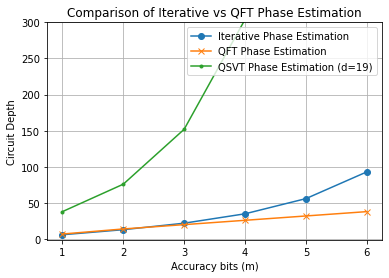

In [7]:
import matplotlib.pyplot as plt

# Sample data: Circuit depths for varying values of m (accuracy bits)
m_values = [1, 2, 3, 4, 5, 6]  # Accuracy bits
iterative_depths = d # Example depths for iterative method
qft_depths = [7, 14, 20, 26, 32, 38]  #  depths for QFT method

# Create a figure and an axes.
fig, ax = plt.subplots()

# Plotting both sets of data
ax.plot(m_values, iterative_depths, label='Iterative Phase Estimation', marker='o')
ax.plot(m_values, qft_depths, label='QFT Phase Estimation', marker='x')
ax.plot(m_values, qsvt, label='QSVT Phase Estimation (d=19)', marker='.')

# Setting labels and title
ax.set_xlabel('Accuracy bits (m)')
ax.set_ylabel('Circuit Depth')
ax.set_title('Comparison of Iterative vs QFT Phase Estimation')

# Adding a legend
ax.legend()

# Optional: set grid
ax.grid(True)
plt.ylim((-1,300))

# Show the plot
plt.show()


## Accuracy with scaling

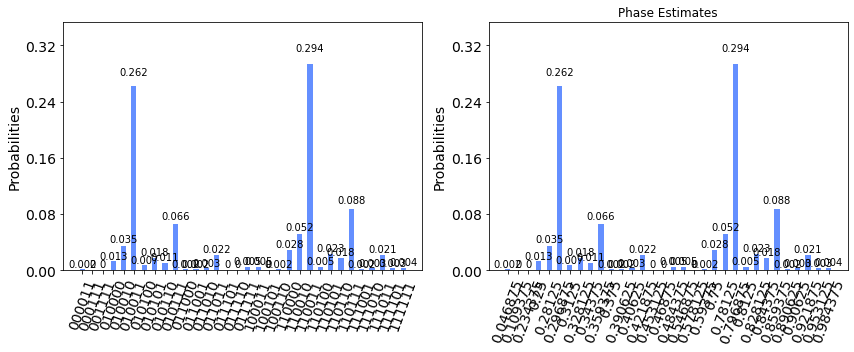

In [33]:
phase = 0.73  # Phase to estimate
m = 6 # Number of bits of precision
qc = run_phase_estimation(phase, m)


## Running on IBM Q : Dynamic Circuits

In [5]:
from qiskit import IBMQ, execute, QuantumCircuit
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Load IBM Q account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-iitmadras', group='internal', project='default')
provider.backends()



C:\Users\Shaurya\anaconda3\envs\QiskitEnv\lib\site-packages\requests_ntlm\requests_ntlm.py:5: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography import x509


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQBackend('ibm_hanoi') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQBackend('ibm_algiers') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQBackend('ibm_cairo') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQBackend('ibm_sherbrooke') from IBMQ(hub='ibm-q-iitmadras', group='internal', project='default')>,
 <IBMQBackend('ibm_brisbane') from 

In [6]:
backend = provider.get_backend('ibm_sherbrooke')  # backend


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def phase_estimation_circuit(phase, m):
    """Creates and returns the phase estimation circuit"""
    sim = backend
    nq = 2  # Number of qubits in the quantum register (constant in this setup)
    q = QuantumRegister(nq, 'q')
    c = ClassicalRegister(m, 'c')
    qc = QuantumCircuit(q, c)

    # Initialize the circuit
    qc.h(0)
    qc.x(1)

    # Controlled-U operations
    for t in range(m):
        repetitions = 2 ** (m - t - 1)
        for _ in range(repetitions):
            qc.cp(2 * np.pi * phase, 0, 1)

        # Measure in the X-basis
        qc.h(0)
        qc.measure(0, t)
        qc.reset(0)
        qc.h(0)

        # Conditional phase based on the classical bit
        if t < m - 1:
            qc.p(-np.pi / 2, 0).c_if(c, 1)

    return qc

def run_phase_estimation(phase, m):
    """Runs the phase estimation and plots histograms"""
    qc = phase_estimation_circuit(phase, m)
    sim = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(qc, backend=sim, dynamic=True)    #Dynamic=True sets dynamic flag
    result = sim.run(transpiled_circuit).result().get_counts()

    # Convert counts to phase estimates
    key_new = [str(int(key, 2) / 2**m) for key in list(result.keys())]
    count_new = dict(zip(key_new, result.values()))

    # Plotting results
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_histogram(result, ax=ax[0], title="Raw Counts")
    plot_histogram(count_new, ax=ax[1], title="Phase Estimates")
    plt.tight_layout()
    plt.show()

    return qc


In [2]:
# Need to flag Dynamic=True in transpile()